<a href="https://colab.research.google.com/github/selcannatakk/selcanatakai-code/blob/main/DecisionTreeClassifier_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [ ]:
# Veri setine 'Type' (çiçek türü için) sütununu ekleyelim
df['Type'] = iris.target
df['Type'] = df['Type'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [ ]:
# 'Type' sütununu Label Encoding ile sayısal verilere dönüştürelim
label_encoder = LabelEncoder()
df['Type_Encoded'] = label_encoder.fit_transform(df['Type'])

In [ ]:
# Sonuçlar
df[['Type', 'Type_Encoded']].head()

,Type,Type_Encoded
0,setosa,0
1,setosa,0
2,setosa,0
3,setosa,0
4,setosa,0


In [ ]:
X = df.drop(columns=['Type', 'Type_Encoded'])  # Özellikler
y = df['Type_Encoded']  # Hedef değişken (etiket)

In [ ]:
# Veriyi eğitim ve test setlerine ayıralım (80% eğitim, 20% test)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Eğitim seti (X_train):", X_train.shape)
print("Test seti (X_val):", X_val.shape)
print("Eğitim etiketleri (y_train):", y_train.shape)
print("Test etiketleri (y_val):", y_val.shape)

Eğitim seti (X_train): (120, 4)
Test seti (X_val): (30, 4)
Eğitim etiketleri (y_train): (120,)
Test etiketleri (y_val): (30,)


In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
Y_pred = model.predict(X_val)

In [ ]:
confusion_matrix = confusion_matrix(y_val, Y_pred)
print(confusion_matrix)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


<Axes: >

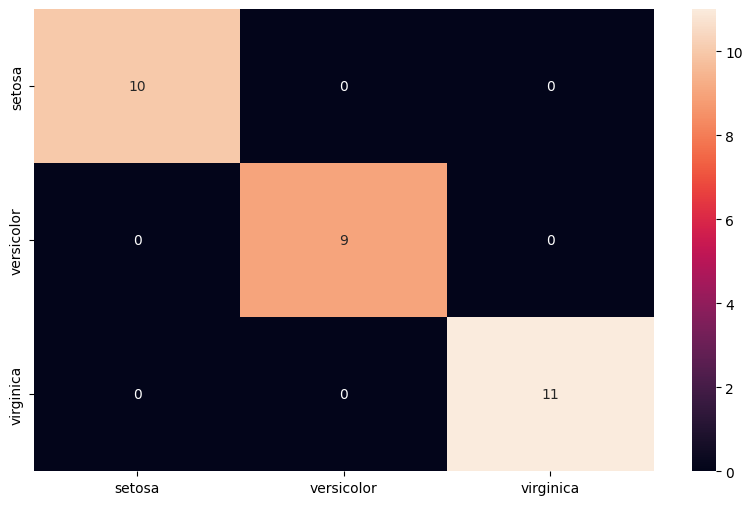

In [ ]:
# X ekseni (sütunlar) modelin tahmin ettiği sınıflar
# Y ekseni (satırlar) ise gerçek sınıflar

index = ['setosa','versicolor','virginica']
columns = ['setosa','versicolor','virginica']
hata_goster = pd.DataFrame(confusion_matrix,columns,index)
plt.figure(figsize=(10,6))
sns.heatmap(hata_goster, annot=True)